1 marzo 

ora inizio 1:00

ora fine 3:44

az: 295

az vero: 290



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import norm

## 20 salita


In [2]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-02-28 23:52:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-02-28 23:53:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 20 salita'

file_parabola = '../../Dati/1 marzo/2023_02_28.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [3]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [4]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [5]:
mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

In [6]:
while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [7]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [8]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [9]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

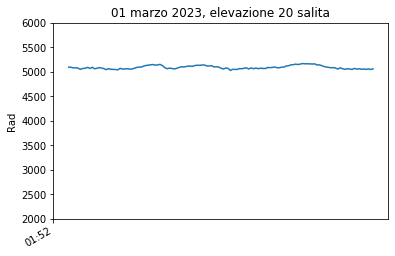

In [10]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [11]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [12]:
df.to_csv('dati20s.csv', index=False)

## 25 salita

In [13]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 00:05:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 00:08:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 25 salita'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [14]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [15]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [16]:
mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

In [17]:
while parabola.at[0,'elevazione'] > 25.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [18]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [19]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [20]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

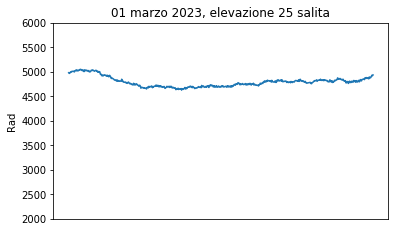

In [21]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [22]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [23]:
df.to_csv('dati25s.csv', index=False)

## 30 salita

In [24]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 00:14:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 00:16:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 30 salita'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [25]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [26]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 30.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

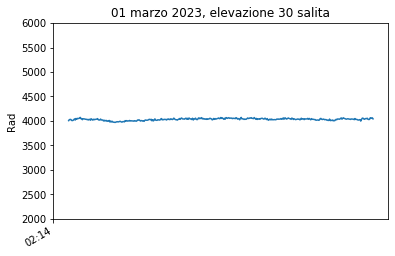

In [27]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [28]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [29]:
df.to_csv('dati30s.csv', index=False)

## 35 salita

In [30]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 00:21:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 00:22:30', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 35 salita'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [31]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [32]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 35.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

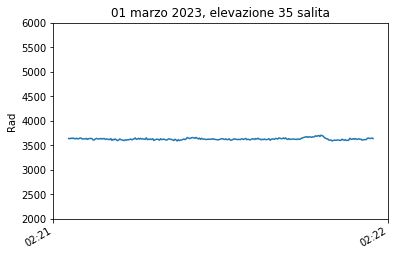

In [33]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [34]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [35]:
df.to_csv('dati35s.csv', index=False)

## 40 salita

In [36]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 00:28:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 00:32:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 40 salita'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [37]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [38]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 40.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

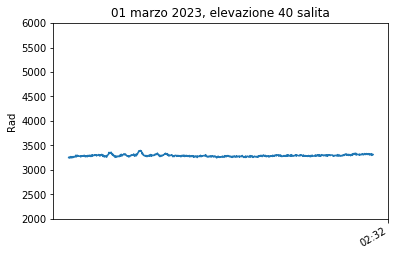

In [39]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [40]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [41]:
df.to_csv('dati40s.csv', index=False)

## 45 salita

In [42]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 00:37:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 00:40:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 45 salita'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [43]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [44]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 45.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

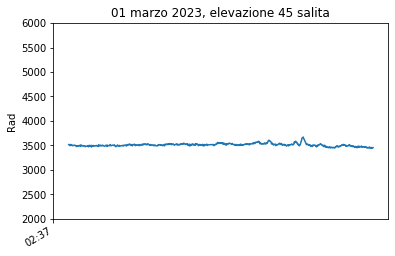

In [45]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [46]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [47]:
df.to_csv('dati45s.csv', index=False)

## 50 salita

In [48]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 00:46:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 00:48:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 50 salita'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [49]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [50]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 50.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

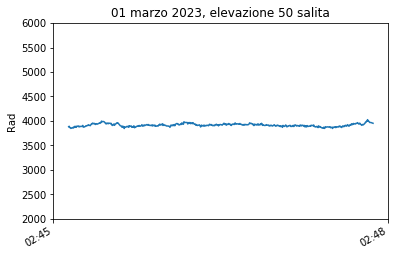

In [51]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [52]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [53]:
df.to_csv('dati50s.csv', index=False)

## elevazione 55

In [54]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 00:53:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 00:56:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 55 salita'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [55]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [56]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 55.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

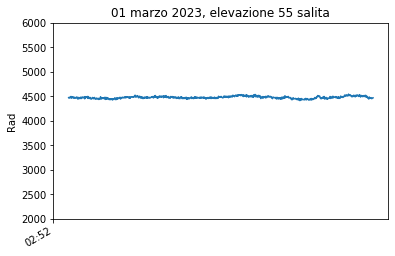

In [57]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [58]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [59]:
df.to_csv('dati55s.csv', index=False)

## 50 discesa

In [60]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 01:00:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 01:04:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 50 discesa'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [61]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [62]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 50.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

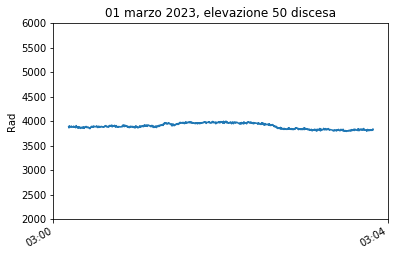

In [63]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [64]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [65]:
df.to_csv('dati50d.csv', index=False)

## 45 discesa

In [66]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 01:04:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 01:12:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 45 discesa'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [67]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [68]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 45.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

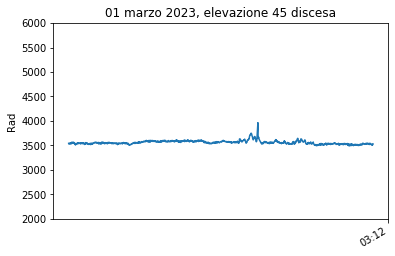

In [69]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [70]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [71]:
df.to_csv('dati45d.csv', index=False)

## 40 discesa

In [72]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 01:17:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 01:20:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 40 discesa'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [73]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [74]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 40.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

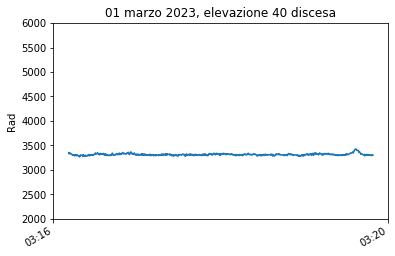

In [75]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [76]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [77]:
df.to_csv('dati40d.csv', index=False)

## 35 discesa

In [78]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 01:26:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 01:28:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 35 discesa'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [79]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [80]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 35.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

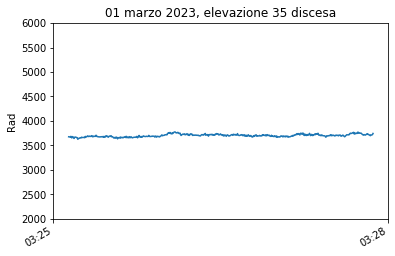

In [81]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [82]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [83]:
df.to_csv('dati35d.csv', index=False)

## 30 discesa

In [84]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 01:34:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 01:36:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 30 discesa'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [85]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [86]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 30.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

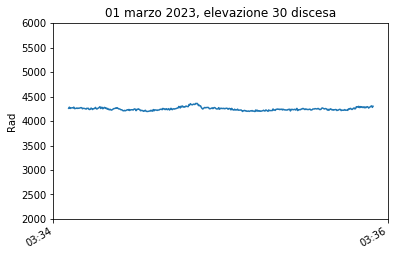

In [87]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [88]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [89]:
df.to_csv('dati30d.csv', index=False)

## 25 discesa

In [90]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 01:40:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 01:44:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 25 discesa'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [91]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [92]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 25.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

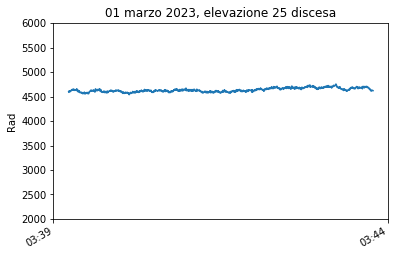

In [93]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [94]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [95]:
df.to_csv('dati25d.csv', index=False)

## 20 discesa

In [96]:
azimuth_min =  294.8
azimuth_max = 295.1

data_i = pd.to_datetime('2023-03-01 01:48:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-01 01:52:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-01 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '01 marzo 2023, elevazione 20 discesa'

file_parabola = '../../Dati/1 marzo/2023_03_01.txt'
file_ricevitore = '../../Dati/1 marzo/2023-03-01.txt'

In [97]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [98]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

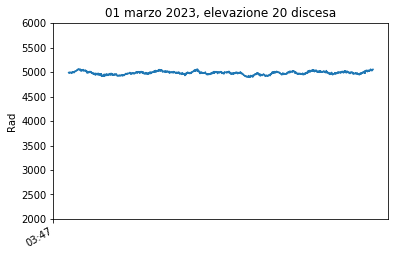

In [99]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [100]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.3
    mask_15 = parabola.elevazione <= j + 0.3
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [101]:
df.to_csv('dati20d.csv', index=False)